#### 복습
- attribute
- KMeans.fit_predict

#### K-means clustering: 클러스터의 개수 결정
- 팔꿈치 방법(elbow method)

#### 예제: Mall customer
- 연습문제

#### 예제: Facebook Live Sellers in Thailand Data Set
- 연습문제

#### 참고
- 사이킷런의 KMeans 함수 구성
- k-means clustering의 장단점과 한계

In [1]:
from pandas import Series, DataFrame 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows': 
    path = 'c:\Windows\Fonts\malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == "Linux":
    !apt -qq -y install fonts-nanum
    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = font_manager.FontProperties(fname=fontpath, size=9)
    rc('font', family='NanumBarunGothic') 
    font_manager._rebuild()
else:
    print("unknown system")

사이킷런(Scikit-learn)이 numpy를 기반으로 하기 때문에, numpy에서 제공하는 다차원 행렬 자료 구조인 ndarray를 잠시 살펴봅니다.

In [3]:
test = np.array([[1, 2, 3], [4, 5, 6]])
type(test)

numpy.ndarray

Pandas의 DataFrame과 비슷하다고 생각할 수 있지만, numpy.ndarray는 모든 아이템이 같은 자료형이어야 합니다. 대신에 계산에 활용하는 경우 속도가 더 빠릅니다.

In [4]:
test

array([[1, 2, 3],
       [4, 5, 6]])

인덱싱과 슬라이싱은 변수[행, 열] 순으로 가능합니다.

In [5]:
print(test[1, 2], test[0, :], test[:, 0])

6 [1 2 3] [1 4]


## 복습
12주차에 진행했던 임의로 생성한 예제 데이터를 살펴봅시다.

In [6]:
from sklearn.datasets import make_blobs

# 인위적으로 2차원 데이터 생성
X1, y1 = make_blobs(n_samples = 300, n_features = 2, random_state = 0)

In [8]:
X1

In [9]:
type(X1)

numpy.ndarray

make_blobs의 결과로 생성된 데이터는 numpy.ndarray로, 각각의 열을 산점도의 x값과 y값으로 아래와 같이 슬라이싱으로 가져와서 그릴 수 있습니다.

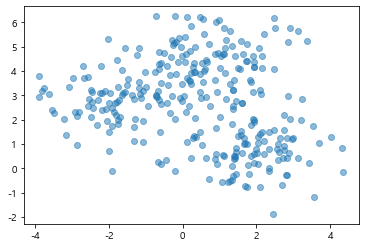

In [10]:
fig, ax = plt.subplots()

ax.scatter(X1[:, 0],X1[:, 1], alpha = 0.5)

plt.show()

사이킷런에서 K-means모델을 만들어 봅시다.

In [11]:
from sklearn.cluster import KMeans

# 군집 모델 생성
km5 = KMeans(n_clusters = 5)
km5.fit(X1)
km5.predict(X1)

array([4, 2, 0, 1, 1, 1, 3, 4, 1, 4, 3, 2, 2, 0, 2, 1, 0, 0, 4, 2, 1, 0,
       2, 4, 1, 1, 3, 1, 2, 2, 3, 4, 3, 2, 2, 1, 2, 3, 4, 3, 1, 2, 4, 2,
       2, 1, 2, 1, 4, 2, 1, 0, 1, 3, 2, 4, 4, 4, 1, 0, 2, 2, 4, 1, 2, 1,
       3, 2, 4, 2, 3, 4, 1, 3, 2, 0, 2, 1, 4, 0, 1, 0, 2, 4, 4, 0, 2, 1,
       0, 4, 3, 2, 1, 0, 2, 2, 4, 3, 1, 3, 2, 4, 0, 2, 0, 0, 1, 0, 3, 2,
       4, 1, 0, 0, 1, 1, 4, 0, 3, 2, 3, 1, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       3, 1, 1, 2, 1, 4, 4, 1, 2, 4, 2, 3, 3, 1, 4, 4, 3, 2, 3, 1, 4, 2,
       1, 1, 2, 2, 4, 2, 4, 0, 2, 4, 4, 0, 0, 0, 3, 1, 2, 0, 4, 2, 3, 2,
       4, 2, 4, 0, 2, 3, 0, 0, 0, 3, 2, 3, 4, 3, 0, 0, 2, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 0, 1, 2, 4, 4, 1, 4, 2, 0, 4, 1, 2, 3, 3, 3, 4, 3, 2,
       3, 3, 2, 2, 0, 1, 1, 4, 0, 3, 4, 2, 2, 4, 2, 1, 1, 3, 3, 4, 2, 1,
       1, 4, 1, 2, 4, 1, 0, 2, 2, 0, 3, 3, 1, 4, 3, 3, 0, 0, 1, 0, 3, 1,
       4, 1, 4, 2, 2, 2, 2, 0, 0, 4, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 3, 4, 2, 0, 4, 4, 2, 4, 3])

#### attribute
피팅(fit)하면 5개의 클러스터를 찾는 k-means clustering 모델 km5가 X1이라는 데이터에 맞추어 학습하여 클러스터 중심을 찾고, cluster center를 비롯한 여러 attribute를 가지게 됩니다.

- cluster_centers_ 클러스터 중심의 좌표
- labels_ 데이터 X1의 각 행(관측치)가 속하는 클러스터. 정수는 클러스터를 구분하기 위한 목적이며 순서는 의미가 없다.
- inertia_ 각 클러스터 중심과 클러스터 내의 데이터 포인트(관측치) 사이의 거리제곱합(오차제곱합; sum of squared error)
- n_iter_ 클러스터 중심을 찾기 위해 반복한 횟수

In [12]:
print(km5.cluster_centers_)
print(km5.labels_)
print(km5.inertia_)
print(km5.n_iter_)

[[ 1.76025659  4.51105826]
 [-2.20179648  2.6812699 ]
 [ 2.14609233  0.61126669]
 [ 0.15446455  2.11088486]
 [-0.13385502  4.58200109]]
[4 2 0 1 1 1 3 4 1 4 3 2 2 0 2 1 0 0 4 2 1 0 2 4 1 1 3 1 2 2 3 4 3 2 2 1 2
 3 4 3 1 2 4 2 2 1 2 1 4 2 1 0 1 3 2 4 4 4 1 0 2 2 4 1 2 1 3 2 4 2 3 4 1 3
 2 0 2 1 4 0 1 0 2 4 4 0 2 1 0 4 3 2 1 0 2 2 4 3 1 3 2 4 0 2 0 0 1 0 3 2 4
 1 0 0 1 1 4 0 3 2 3 1 3 2 2 1 2 2 2 1 1 1 3 1 1 2 1 4 4 1 2 4 2 3 3 1 4 4
 3 2 3 1 4 2 1 1 2 2 4 2 4 0 2 4 4 0 0 0 3 1 2 0 4 2 3 2 4 2 4 0 2 3 0 0 0
 3 2 3 4 3 0 0 2 2 1 0 2 1 0 1 2 1 0 1 2 4 4 1 4 2 0 4 1 2 3 3 3 4 3 2 3 3
 2 2 0 1 1 4 0 3 4 2 2 4 2 1 1 3 3 4 2 1 1 4 1 2 4 1 0 2 2 0 3 3 1 4 3 3 0
 0 1 0 3 1 4 1 4 2 2 2 2 0 0 4 0 0 1 1 2 0 0 2 2 2 1 2 1 1 2 2 1 3 4 2 0 4
 4 2 4 3]
372.00000179867004
5


#### KMeans.fit_predict
5개의 클러스터를 찾는 k-means clustering 모델 km5를 만들고, 데이터 X1에 따라 학습하여 클러스터 중심 위치를 찾습니다(fit). 만약 새로운 데이터가 들어온다면 기존 데이터 X1에서 지정한 클러스터 중심 위치에 따라, 새로운 데이터가 어느 클러스터에 속하는지 predict로 예측해 볼 수 있을 겁니다. 사이킷런에서 제공하는 다른 머신러닝 알고리즘은 모델을 학습시키고 새로운 데이터에 적용하는 과정을 거치기 때문에 fit/predict를 구분합니다.<br>
하지만, 클러스터링은 기본적으로 예측하기보다는 이미 가지고 있는 데이터를 이해하기 위해 주로 사용하는 방법론이기 때문에 fit과 predict를 나누지 않고 한번에 진행합니다. 

fit_predict의 결과는 predict와 같이 각 관측치가 속하는 클러스터입니다.

In [14]:
help(KMeans.fit_predict)

Help on function fit_predict in module sklearn.cluster._kmeans:

fit_predict(self, X, y=None, sample_weight=None)
    Compute cluster centers and predict cluster index for each sample.
    
    Convenience method; equivalent to calling fit(X) followed by
    predict(X).
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        New data to transform.
    
    y : Ignored
        Not used, present here for API consistency by convention.
    
    sample_weight : array-like of shape (n_samples,), default=None
        The weights for each observation in X. If None, all observations
        are assigned equal weight.
    
    Returns
    -------
    labels : ndarray of shape (n_samples,)
        Index of the cluster each sample belongs to.



In [13]:
X1_c5 = km5.fit_predict(X1)
print(X1_c5)

[2 3 4 1 1 1 0 2 1 2 0 3 3 4 3 1 4 4 2 3 1 4 3 2 1 1 0 1 3 3 0 2 0 3 3 1 3
 0 2 0 1 3 2 3 3 1 3 1 2 3 1 4 1 0 3 2 2 2 1 4 3 3 2 1 3 1 0 3 2 3 0 2 1 0
 3 4 3 1 2 4 1 4 3 2 2 4 3 1 4 2 0 3 1 4 3 3 2 0 1 0 3 2 4 3 4 4 1 4 0 3 2
 1 4 4 1 1 2 4 0 3 0 1 0 3 3 1 3 3 3 1 1 1 0 1 1 3 1 2 2 1 3 2 3 0 0 1 2 2
 0 3 0 1 2 3 1 1 3 3 2 3 2 4 3 2 2 4 4 4 0 1 3 4 2 3 0 3 2 3 2 4 3 0 4 4 4
 0 3 0 2 0 4 4 3 3 1 4 3 1 4 1 3 1 4 1 3 2 2 1 2 3 4 2 1 3 0 0 0 2 0 3 0 0
 3 3 4 1 1 2 4 0 2 3 3 2 3 1 1 0 0 2 3 1 1 2 1 3 2 1 4 3 3 4 0 0 1 2 0 0 4
 4 1 4 0 1 2 1 2 3 3 3 3 4 4 2 4 4 1 1 3 4 4 3 3 3 1 3 1 1 3 3 1 0 2 3 4 2
 2 3 2 0]


5개의 클러스터를 찾는 k-means clustering 모델 km5을 데이터 X1으로 fit&predict하여 나온 결과를 산점도로 시각화해봅시다.

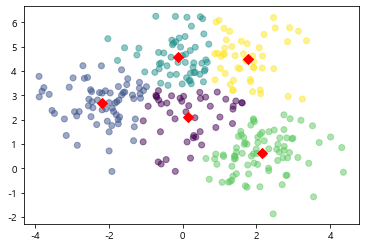

In [15]:
fig, ax = plt.subplots()

# 전체 데이터
ax.scatter(X1[:, 0],X1[:, 1], 
           c = X1_c5, 
           alpha = 0.5)

# 클러스터 중심
ax.scatter(km5.cluster_centers_[:, 0], km5.cluster_centers_[:, 1], 
           s = 50,
           marker = 'D',
           c='r')

plt.show()

모델을 다른 데이터를 사용해서 학습시키면 다른 결과를 얻을 수 있습니다. 5개의 클러스터를 찾는 k-means clustering 모델 km5에 다른 데이터 X2를 넣어봅니다.

In [16]:
X2, y2 = make_blobs(n_samples = 150, n_features = 2, random_state = 5)

In [17]:
X2_c5 = km5.fit_predict(X2)
print(X2_c5)

[3 1 4 2 4 3 0 1 0 2 1 4 1 1 0 2 2 4 2 2 0 0 0 0 0 0 3 2 2 1 2 3 2 2 0 3 1
 2 1 0 2 3 2 1 0 3 1 0 3 2 0 0 1 1 2 3 2 2 1 0 2 2 4 3 1 3 2 4 1 2 0 3 3 4
 1 0 0 2 2 2 2 2 2 1 4 1 1 1 0 1 2 0 1 2 1 2 3 3 0 4 1 1 2 1 4 3 1 3 0 3 4
 0 0 1 1 3 0 1 0 2 1 1 2 3 0 1 0 4 4 0 2 2 4 2 0 1 4 4 1 1 3 2 0 1 0 0 3 3
 1 2]


5개의 클러스터를 찾는 k-means clustering 모델에 다른 데이터를 넣었기 때문에 다른 결과가 나왔습니다.

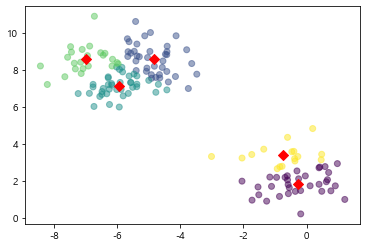

In [18]:
fig, ax = plt.subplots()

ax.scatter(X2[:, 0],X2[:, 1],
           c = X2_c5, 
           alpha = 0.5)

ax.scatter(km5.cluster_centers_[:, 0], km5.cluster_centers_[:, 1],
           s = 50,
           marker = 'D',
           c='r')

plt.show()

## K-means clustering: 클러스터의 개수 결정

최적의 클러스터 개수를 찾는 표준화된 방법은 없습니다.<br>
다만, 클러스터의 개수가 데이터가 흩어진 정도(분산)를 얼마나 __설명__하는지에 따라 참고해 볼 수 있는 팔꿈치 방법(elbow method)를 소개합니다.

### 팔꿈치 방법(elbow method)
- 클러스터를 추가할수록 각 클러스터의 데이터 포인트와 클러스터 중심의 거리 제곱합(오차제곱합; sum of squared error)가 점점 감소
- 클러스터를 더 추가할수록 감소폭이 줄어들기 때문에 그래프상에서 평평하게 되는 지점이 있으며, 이러한 성질 때문에 팔꿈치라는 이름이 붙음
- 팔꿈치가 꺾이는 지점을 참고

#### 오차제곱합

모델을 원하는 데이터에 맞추어 피팅한 후 inertia_에서 각 클러스터의 데이터 포인트와 클러스터 중심의 거리 제곱합(오차제곱합; sum of squared error)을 가져올 수 있습니다. 클러스터 수가 1개부터 6개까지 여섯 개의 모델에 대해 클러스터링을 진행하고 오차제곱합을 계산합니다.

<img src = "https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/sse.png?raw=true"/>

아래 코드에서 sse라는 빈 리스트 변수를 우선 정의했고, 리스트에 아이템을 하나씩 더하는 append 메서드를 이용하여 각 모델의 오차제곱합을 저장합니다.

In [19]:
sse = []

km1 = KMeans(n_clusters = 1)
km1.fit_predict(X1)
sse.append(km1.inertia_)

km2 = KMeans(n_clusters = 2)
km2.fit_predict(X1)
sse.append(km2.inertia_)

km3 = KMeans(n_clusters = 3)
km3.fit_predict(X1)
sse.append(km3.inertia_)
# print(sse)

km4 = KMeans(n_clusters = 4)
km4.fit_predict(X1)
sse.append(km4.inertia_)

km5 = KMeans(n_clusters = 5)
km5.fit_predict(X1)
sse.append(km5.inertia_)

km6 = KMeans(n_clusters = 6)
km6.fit_predict(X1)
sse.append(km6.inertia_)

print(sse)

[1924.5475160226385, 1010.0503990300524, 536.4262880292933, 448.2008702800523, 372.00000179867004, 316.86088913393417]


수업에서 다루지 않았지만 반복문을 사용하면 코드가 훨씬 간결해집니다. 참고하시기 바랍니다.

In [ ]:
# sse = []

# for i in range(1, 7):
#     kmeans = KMeans(n_clusters = i)
#     kmeans.fit_predict(X1)
#     sse.append(kmeans.inertia_)

# print(sse)

리스트 변수 sse를 시각화해서 꺾이는 점을 찾아봅니다.

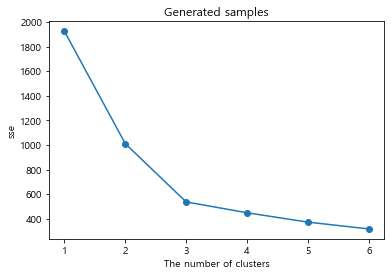

In [20]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4, 5, 6], 
        sse, 
        marker = 'o')

ax.set(title = 'Generated samples',
      xlabel = 'The number of clusters',
      ylabel = 'sse')

plt.show()

클러스터의 개수가 3개 이상으로 증가하면 오차제곱합의 감소폭이 줄어드는 것을 확인할 수 있습니다. 결과를 확인하고 적절한 개수의 클러스터를 선정하여 결과를 확인합니다.

In [21]:
X1_c3 = km3.fit_predict(X1)
X1_c3

array([0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1,
       0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2,
       1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1,
       1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0])

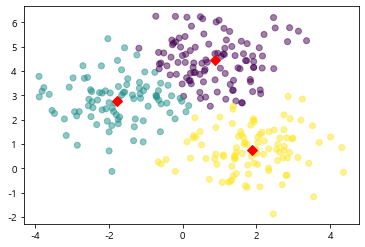

In [22]:
fig, ax = plt.subplots()

ax.scatter(X1[:, 0],X1[:, 1],
           c = X1_c3, 
           alpha = 0.5)

ax.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1],
           s = 50,
           marker = 'D',
           c='r')

plt.show()

## 예제: Mall customer

쇼핑몰의 회원 카드에 고객의 ID와 성별, 나이, 연소득(annual income), 지출점수(spending score)가 있습니다. 지출점수는 고객의 행동과 구매 기록을 바탕으로 매긴 점수입니다. 연소득과 지출점수를 바탕으로 고객을 여러 집단으로 나누어 보려고 합니다.<br>
(Segmentation: 소비자의 수요가 동일하지 않으며 몇 가지 요소로 구분할 수 있는 다양한 집단으로 구성되어 있다고 가정하며, 각각의 집단에 따라 다른 전략을 적용하기 위해 나누어 보는 과정이다. Targeting과 Promotion에 선행한다.)

https://www.kaggle.com/kandij/mall-customers

In [23]:
mall_customers_url = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/Mall_Customers.csv"
df = pd.read_csv(mall_customers_url, encoding = 'utf-8')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df['CustomerID'].nunique()

200

In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


결측치와 중복값이 없으니 전반적인 분포를 살펴봅시다.

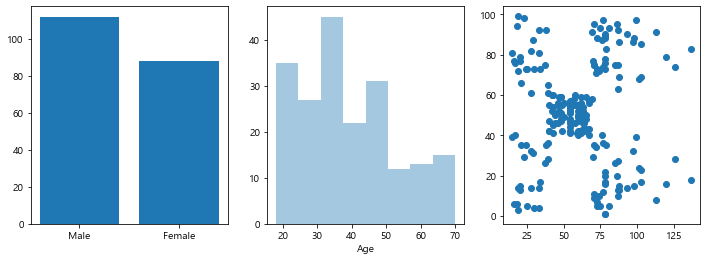

In [26]:
fig, axs = plt.subplots(figsize = (12, 4), nrows = 1, ncols = 3)

axs[0].bar(df['Genre'].unique(), df['Genre'].value_counts())

sns.distplot(df['Age'], ax = axs[1], kde = False)

axs[2].scatter(df['Annual Income (k$)'], 
                df['Spending Score (1-100)'])

plt.show()

K-means clustering 모델에 넣기 위해 필요한 변수, 연소득과 지출점수만 가져와서 새로운 DataFrame 'income_spent'를 만듭니다.

In [27]:
income_spent = df.iloc[:, 3:5]
income_spent

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


몇 개의 클러스터가 적절한지 참고해 보기 위하여 오차제곱합을 구합니다. 아까 만든 클러스터 1개~6개 모델에 income_spent 데이터를 넣어 결과를 봅니다.

In [28]:
segment_sse = []

km1.fit_predict(income_spent)
segment_sse.append(km1.inertia_)

km2.fit_predict(income_spent)
segment_sse.append(km2.inertia_)

km3.fit_predict(income_spent)
segment_sse.append(km3.inertia_)

km4.fit_predict(income_spent)
segment_sse.append(km4.inertia_)

km5.fit_predict(income_spent)
segment_sse.append(km5.inertia_)

km6.fit_predict(income_spent)
segment_sse.append(km6.inertia_)

print(segment_sse)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37239.83554245604]


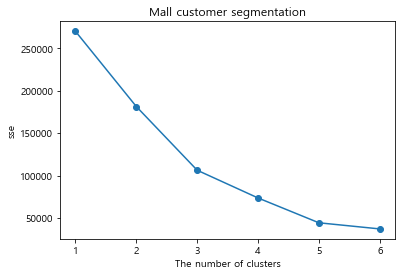

In [29]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4, 5, 6], 
        segment_sse, 
        marker = 'o')

ax.set(title = 'Mall customer segmentation',
      xlabel = 'The number of clusters',
      ylabel = 'sse')

plt.show()

5~6 사이에서 큰 변화가 없으므로 5개 클러스터로 클러스터 시각화를 진행합니다.

In [30]:
segment_result = km5.fit_predict(income_spent)

K-means clustering의 fit_predict의 결과로 돌려주는 각 관측치의 클러스터 정보는 numpy.ndarray 자료형입니다. 각 클러스터에 몇 개의 관측치가 속하는지 클러스터의 크기를 아래와 같이 살펴볼 수 있습니다.

In [31]:
np.unique(segment_result, return_counts=True)

(array([0, 1, 2, 3, 4]), array([35, 81, 39, 23, 22], dtype=int64))

각 관측치를 5개의 클러스터로 나눈 결과 segment_result와 함께 클러스터의 중심을 그립니다. 

다섯 개의 클러스터는 연소득과 지출점수로 미루어 보았을 때 다음과 같이 이름을 붙여서 구분할 수 있습니다.
    - ordinary: 버는 만큼 지출하는 일반 소비자들입니다.
    - overspending: 소득에 비해 많이 지출하는 경향이 있는 소비자들입니다.
    - underspending: 소득에 비해 적게 지출하는 경향이 있는 소비자들입니다. 소비 여력이 있으므로 왜 이 쇼핑몰에서 더 소비하지 않는지 이유를 탐색해서 전략을 세울 필요가 있습니다.
    - best: 많이 버는 만큼 많이 사용하는 우수고객입니다. 다른 쇼핑몰로 떠나지 않게끔 잘 붙들어 놓아야 합니다.
    - sensible: 적게 버는 만큼 적게 지출하는 소비자들입니다. 할인 행사로 끌어들일 수는 있으나 다른 품목까지 소비하게 만들기에는 쉽지 않을 것으로 보입니다.
    
많은 경우에 클러스터링에 사용하지 않은 다른 변수들에도 차이가 있는지까지 비교해서 클러스터의 수를 결정하게 됩니다.

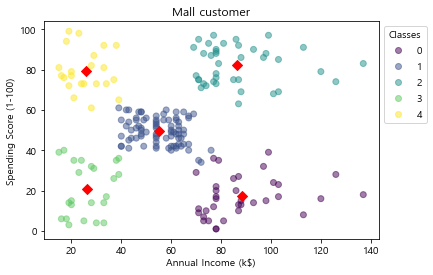

In [32]:
fig, ax = plt.subplots()

scatter1 = ax.scatter(income_spent.iloc[:, 0], 
                      income_spent.iloc[:, 1],
           c = segment_result, 
           alpha = 0.5)

handles, labels = scatter1.legend_elements()
# mylabels = ['ordinary', 'overspending', 'underspending', 'best', 'sensible']

# ax.legend(handles, mylabels,
ax.legend(handles, labels,
          bbox_to_anchor=(1, 1), loc = 'upper left', # week10
          title="Classes")

ax.scatter(km5.cluster_centers_[:, 0], 
           km5.cluster_centers_[:, 1],
           s = 50,
           marker = 'D',
           c='r')

ax.set(title = 'Mall customer',
      xlabel = 'Annual Income (k$)',
      ylabel = 'Spending Score (1-100)')

plt.show()

이전 클러스터링 시각화 코드와의 차이는 두 가지입니다. 

1. scatter1.legend_elements(): scatter1이라는 변수에 저장한 산점도에서 범례로 구분할 필요가 있는 요소(handles)와 그 라벨(labels)을 tuple로 추출합니다. 범례를 자동화하여 그릴 수 있습니다.
    - 예제:
    https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html#automatedlegendcreation
    - 설명
    https://matplotlib.org/3.1.1/api/collections_api.html#matplotlib.collections.PathCollection.legend_elements


2. 매개변수 bbox_to_anchor와 loc을 같이 사용하는 경우, loc은 범례 박스의 네 귀퉁이(upper&lower)/네 변의 중심점(center)을 나타냅니다. 먼저 bbox_to_anchor로 figure에 기준이 되는 좌표를 지정한 후, 해당 좌표에 범례 박스가 접하는 부분을 loc에 명시합니다. (week10 실습)

In [35]:
scatter1.legend_elements()

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
Week10에서 산점도를 그렸던 영화 데이터를 사용합니다. 

- 스크린수와 매출액의 산점도를 먼저 그리세요.
- 스크린수와 매출액 기준으로 클러스터를 나누어 보되, 팔꿈치 방법을 참고해서 클러스터의 개수를 결정하세요.
- 각 클러스터에 이름을 붙여 보세요.

In [36]:
url_vis = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/midterm_vis.csv"

movie = pd.read_csv(url_vis, encoding = 'utf-8')
movie.info()
movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화코드    529 non-null    int64 
 1   영화명     529 non-null    object
 2   개봉연월일   529 non-null    object
 3   매출액     529 non-null    int64 
 4   관객수     529 non-null    int64 
 5   스크린수    529 non-null    int64 
 6   상영횟수    529 non-null    int64 
 7   개봉연도    529 non-null    int64 
 8   개봉월     529 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 37.3+ KB


,영화코드,영화명,개봉연월일,매출액,관객수,스크린수,상영횟수,개봉연도,개봉월
0,20090834,아바타,2009-12-17,81455728000,8151952,714,111860,2009,12
1,20100214,아저씨,2010-08-04,47101332000,6178248,501,109853,2010,8
2,20100312,인셉션,2010-07-21,44309381800,5937741,772,89880,2010,7
3,20090904,의형제,2010-02-04,40153729000,5416812,569,118243,2010,2
4,20090933,아이언맨 2,2010-04-29,32635195500,4425003,921,87665,2010,4


## 예제: Facebook Live Sellers in Thailand Data Set

10명의 태국 패션/화장품 판매자의 페이스북 포스팅 및 포스팅에 대한 반응(engagement; 좋아요, 공유 등) 데이터셋입니다.

http://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [44]:
# fb_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live.csv"
fb_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"
fb = pd.read_csv(fb_url)
fb.info()
fb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


필요 없는 열을 제외합니다.

In [45]:
fb = fb.iloc[:, :12]
fb.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


status_id를 기준으로 중복이 있는지 살핍니다.

In [46]:
fb[fb.duplicated(['status_id'], keep = False)].sort_values('status_id')

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys


어떤 종류의 게시물이 있는지 확인해 봅니다.

In [47]:
fb['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

비디오만 대상으로 해서 공유(num_shares)와 좋아요(num_likes)를 기준으로 클러스터링을 진행할 예정입니다.

In [48]:
fb_video = fb[fb['status_type'] == 'video']
fb_video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 7034
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         2334 non-null   int64 
 1   status_type       2334 non-null   object
 2   status_published  2334 non-null   object
 3   num_reactions     2334 non-null   int64 
 4   num_comments      2334 non-null   int64 
 5   num_shares        2334 non-null   int64 
 6   num_likes         2334 non-null   int64 
 7   num_loves         2334 non-null   int64 
 8   num_wows          2334 non-null   int64 
 9   num_hahas         2334 non-null   int64 
 10  num_sads          2334 non-null   int64 
 11  num_angrys        2334 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 237.0+ KB


우선 산점도를 그려봅니다.

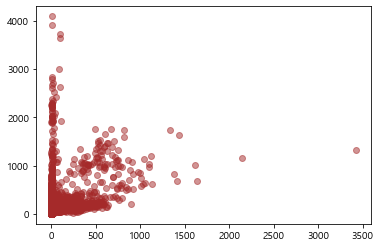

In [49]:
fig, ax = plt.subplots()

ax.scatter(fb_video['num_shares'], fb_video['num_likes'], marker = 'o', alpha = 0.5, color = 'brown')
plt.show()

오차제곱항을 클러스터 1개 모델부터 6개 모델까지 구합니다. 

In [50]:
video_sse = []

km1.fit_predict(fb_video.loc[:, ['num_shares', 'num_likes']])
video_sse.append(km1.inertia_)

km2.fit_predict(fb_video.loc[:, ['num_shares', 'num_likes']])
video_sse.append(km2.inertia_)

km3.fit_predict(fb_video.loc[:, ['num_shares', 'num_likes']])
video_sse.append(km3.inertia_)

km4.fit_predict(fb_video.loc[:, ['num_shares', 'num_likes']])
video_sse.append(km4.inertia_)

km5.fit_predict(fb_video.loc[:, ['num_shares', 'num_likes']])
video_sse.append(km5.inertia_)

km6.fit_predict(fb_video.loc[:, ['num_shares', 'num_likes']])
video_sse.append(km6.inertia_)

print(video_sse)

[498230181.3663265, 207482057.81633225, 141380000.5824144, 108482920.32990345, 84968097.2896348, 67742809.2646745]


팔꿈치가 확실하게 꺾이는 편은 아닙니다. 이런 경우에는 3~5개를 모두 그려서 클러스터 간 차이를 살펴보고 정하게 됩니다.

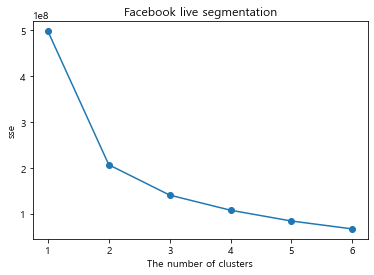

In [51]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4, 5, 6], 
        video_sse, 
        marker = 'o')

ax.set(title = 'Facebook live segmentation',
      xlabel = 'The number of clusters',
      ylabel = 'sse')

plt.show()

5개 클러스터 모델을 선택했습니다.

In [52]:
video_result = km5.fit_predict(fb_video.loc[:, ['num_shares', 'num_likes']])

In [53]:
np.unique(video_result, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 100, 1504,   45,  162,  523], dtype=int64))

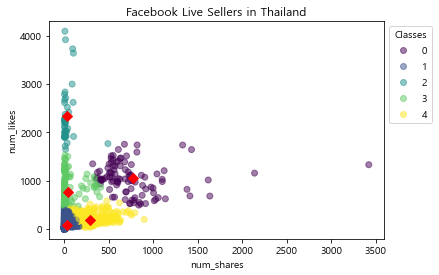

In [54]:
fig, ax = plt.subplots()

scatter1 = ax.scatter(fb_video.loc[:, ['num_shares']], 
                      fb_video.loc[:, ['num_likes']],
                      c = video_result, 
                      alpha = 0.5)

handles, labels = scatter1.legend_elements()
# mylabels = ['majority', 'm_likes', 'm_shares', 'h_likes', 'like-share']

# ax.legend(handles, mylabels,
ax.legend(handles, labels,
          bbox_to_anchor=(1, 1), loc = 'upper left', # week10
          title="Classes")

ax.scatter(km5.cluster_centers_[:, 0], 
           km5.cluster_centers_[:, 1],
           s = 50,
           marker = 'D',
           c='r')

ax.set(title = 'Facebook Live Sellers in Thailand',
      xlabel = 'num_shares',
      ylabel = 'num_likes')

plt.show()

게시물 대부분은 관심도 공유도 못 받지만, like를 받는 게시물과 share를 받는 게시물이 나뉘는 이유가 궁금합니다. 추가 데이터가 있으면 살펴볼 수 있는 부분이 아닐까 합니다.

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
Facebook Live Sellers in Thailand Data Set의 모든 데이터를 대상으로 진행합니다.

- 댓글 수(num_comments)와 좋아요 수(num_likes)의 산점도를 먼저 그리세요.
- 댓글 수(num_comments)와 좋아요 수(num_likes)를 기준으로 클러스터를 나누어 보되, 팔꿈치 방법을 참고해서 클러스터의 개수를 결정하세요.
- 각 클러스터에 이름을 붙여 보세요.

In [55]:
fb.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


## 참고
#### 사이킷런의 KMeans 함수 구성

사이킷런의 K-means clustering은 KMeans 함수에 구현되어 있습니다. 중요한 몇 가지 매개변수를 소개합니다.

- __n_clustersint, default=8__ <br>
클러스터 수

- __init{‘k-means++’, ‘random’} or ndarray of shape (n_clusters, n_features), default=’k-means++’__ <br>
처음 클러스터 중심점(cluster center/centroid)의 위치를 선택하는 알고리즘입니다. k-means++는 첫 중심점은 임의로 선택하되 다음 중심점은 이전에 선택한 중심점과 먼 좌표가 선택되도록 확률분포를 조정합니다. random은 무작위입니다. 

- __max_iterint, default=300__ <br>
큰 데이터의 경우 최적의 중심점을 찾는 데 계산이 많이 필요할 수 있습니다. 이 때 몇 번이나 다시 계산할지 최대값을 설정합니다. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [ ]:
help(KMeans)

#### k-means clustering의 장단점과 한계

사이킷런의 클러스터링에서는 여러 클러스터링 알고리즘이 예제 데이터에 적용된 결과를 확인하실 수 있습니다.

링크: https://scikit-learn.org/stable/modules/clustering.html

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png'/>